# Project 2
### Real State Data

In [4]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# importing csv file
raw_csv = pd.read_csv('RealState_raw.csv')
raw_csv.head(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838.0,CA,2.0,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222.0,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823.0,CA,3.0,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212.0,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815.0,CA,2.0,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880.0,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815.0,CA,2.0,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307.0,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824.0,CA,2.0,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900.0,38.519470,-121.435768


In [19]:
# Counting Total Rows
data = raw_csv
count = data.count()
count

street       985
city         985
zip          929
state        969
beds         973
baths        985
sq__ft       985
type         985
sale_date    985
price        910
latitude     985
longitude    985
dtype: int64

In [20]:
# Finding null values
count = data.isnull().sum()
count

street        0
city          0
zip          56
state        16
beds         12
baths         0
sq__ft        0
type          0
sale_date     0
price        75
latitude      0
longitude     0
dtype: int64

> It seems, columns (zip, state, beds & price) has some null values. We need to clean data before we can analyize it.

In [28]:
# Finding rows with any NULL value in a row
d_row_data= data[pd.isnull(data).any(axis=1)]
d_row_data

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
7,2561 19TH AVE,SACRAMENTO,NaN,CA,3.0,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002.0,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,NaN,CA,2.0,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905.0,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,NaN,CA,3.0,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937.0,38.700909,-121.442979
10,645 MORRISON AVE,SACRAMENTO,95838.0,CA,3.0,2,909,Residential,Wed May 21 00:00:00 EDT 2008,NaN,38.637663,-121.451520
11,4085 FAWN CIR,SACRAMENTO,95823.0,CA,3.0,2,1289,Residential,Wed May 21 00:00:00 EDT 2008,NaN,38.470746,-121.458918
19,113 LEEWILL AVE,RIO LINDA,95673.0,NaN,3.0,2,1356,Residential,Wed May 21 00:00:00 EDT 2008,121630.0,38.689999,-121.463220
20,6118 STONEHAND AVE,CITRUS HEIGHTS,95621.0,NaN,3.0,2,1118,Residential,Wed May 21 00:00:00 EDT 2008,122000.0,38.707851,-121.320707
21,4882 BANDALIN WAY,SACRAMENTO,95823.0,NaN,4.0,2,1329,Residential,Wed May 21 00:00:00 EDT 2008,122682.0,38.468173,-121.444071
22,7511 OAKVALE CT,NORTH HIGHLANDS,95660.0,NaN,4.0,2,1240,Residential,Wed May 21 00:00:00 EDT 2008,123000.0,38.702792,-121.382210
40,4800 WESTLAKE PKWY Unit 2109,SACRAMENTO,NaN,CA,2.0,2,1304,Condo,Wed May 21 00:00:00 EDT 2008,152000.0,38.658812,-121.542345


> Replacing all NULL values with 0

In [144]:
clean_csv = data.fillna(0.0)
#clean_csv
clean_csv.replace(to_replace={'state':{0:'CA'}}, inplace = True) # Replacing 0 to CA since its only CA Data
clean_csv.to_csv('RealState_Clean.csv', index= False) # Exporting clean data to new CSV
new_data = pd.read_csv('RealState_clean.csv') # Importign CSV to new variable
new_data.isnull().sum() # Checking if there any NULL Values

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [248]:
PropertyType= new_data.groupby(['type']).size()
PropertyType

type
Condo            54
Multi-Family     13
Residential     917
Unkown            1
dtype: int64

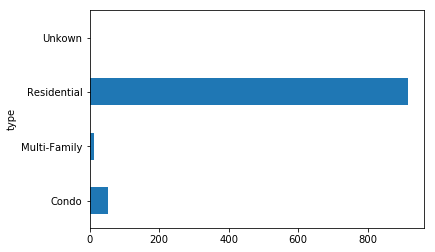

In [246]:
PropertyType.plot.barh()

In [217]:
MaxPrice_sale = new_data.loc[new_data['type'] == 'Residential', ['beds', 'price', 'sale_date']].sort_values(by='price', ascending=False).head(4)
MaxPrice_sale

,beds,price,sale_date
864,4.0,884790.0,Fri May 16 00:00:00 EDT 2008
863,4.0,879000.0,Fri May 16 00:00:00 EDT 2008
334,4.0,839000.0,Tue May 20 00:00:00 EDT 2008
157,6.0,830000.0,Wed May 21 00:00:00 EDT 2008


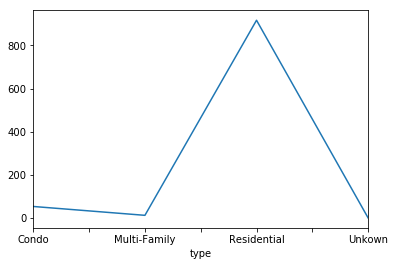

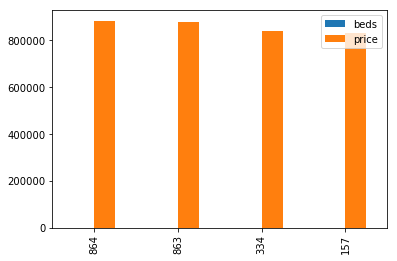

In [225]:
PropertyType.plot()
MaxPrice_sale.plot.bar()


### Result of City which has highest quantity of property sales

In [263]:
citydata= new_data.groupby(['city']).size().sort_values(ascending=False).head(10)
citydata

city
SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
NORTH HIGHLANDS     21
GALT                21
dtype: int64

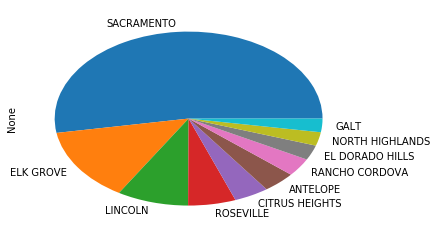

In [262]:
citydata.plot.pie()